# Group One Final Notebook

Computer Vision is seeking to break into the original content arena in order to compete with giants of the streaming industry. In an effort to ensure that Computer Vision makes films that will generate the most revenue, Deloitte has been retained to examine numerous data sources to help guide effective decision making. 

At the end of the day, Computer Vision is a business and it is imperative that it make as much money as possible. With these facts in mind, Deloitte set out to find what movies are most profitable and what characteristics those films have in common. 

At Computer Vision’s request, Deloitte examined numerous reputable data sources including: the Internet Movie Database, Rotten Tomatoes, The Numbers, Box Office Mojo, and the Movie Database. 

Within these databases, we used information about Production Budget, Worldwide Gross Revenue, Release Data, Studio, and Genre. These categories of information yielded information that will help Computer Vision produce films that will have profitable characteristics. 


## Import all necessary Libraries

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline
import scipy.stats as stats
from math import sqrt

In [2]:
tmdb = pd.read_csv("data/zippedData/tmdb.movies.csv.gz")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
tn_budgets = pd.read_csv("data/zippedData/tn.movie_budgets.csv.gz")
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


To clean this dataframe, the only things to do would be convert production_budget, domestic_gross, and worldwide_gross to integer data types and change release_date to datetime data type.

### Data Cleaning

In [4]:
# change release_date column from str to datetime 
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])

# cleaning the production_budget column of dollar signs and commas and changing data type from string to int
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$','')
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',','')
tn_budgets = tn_budgets.astype({'production_budget': 'int64'})

# cleaning the domestic_gross column of dollar signs and commas and changing data type from string to int
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$','')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',','')
tn_budgets = tn_budgets.astype({'domestic_gross': 'int64'})

# cleaning the worldwide_gross column of dollar signs and commas and changing data type from string to int
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$','')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',','')
tn_budgets = tn_budgets.astype({'worldwide_gross': 'int64'})

# Find the net revenue and assigning the values to the new column named Net Revenue 
tn_budgets['Net Revenue'] = tn_budgets['worldwide_gross'] - tn_budgets['production_budget']
tn_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,Net Revenue
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,5.989970e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.460889e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-2.189071e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,8.550286e+06
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,6.096850e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09


___
# Genre Analysis
---

We are interested in exploring how a film’s genre relates to the amount of net revenue generated for a movie. We believe this is an important factor because many people have preferences when it comes to genre, and typically watch more of their favorite types of movies. Some of the most popular movies are Action, Adventure, Science Fiction, and Drama, and we are curious to know if this translates to higher net revenue for these particular genres. We speculate that this analysis will provide valuable insight into what genres should be the focus of Computer Vision’s movie productions.

In [5]:
genre_df = pd.merge(tmdb, tn_budgets, left_on=['title'], right_on=['movie'])
genre_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         2385 non-null   int64         
 1   genre_ids          2385 non-null   object        
 2   id_x               2385 non-null   int64         
 3   original_language  2385 non-null   object        
 4   original_title     2385 non-null   object        
 5   popularity         2385 non-null   float64       
 6   release_date_x     2385 non-null   object        
 7   title              2385 non-null   object        
 8   vote_average       2385 non-null   float64       
 9   vote_count         2385 non-null   int64         
 10  id_y               2385 non-null   int64         
 11  release_date_y     2385 non-null   datetime64[ns]
 12  movie              2385 non-null   object        
 13  production_budget  2385 non-null   int64         
 14  domestic

We see that we have shrunk the dataset to 2385 but believe that to be sufficient enough to conduct further analysis.



In [6]:
genre_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516,334545516
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516,334545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642,675524642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,26323,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,66,2009-11-06,The Box,25000000,15051977,34356760,9356760
2381,26425,[10402],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,66,2009-11-06,The Box,25000000,15051977,34356760,9356760
2382,26092,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660,12970660
2383,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,2005-08-26,Undiscovered,9000000,1069318,1069318,-7930682


In [7]:
# We notice some duplicates and choose to remove those.
genre_df = genre_df[genre_df['title'] != 'Home']
genre_df = genre_df.drop_duplicates(subset='title')


In [8]:
genre_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516,334545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642,675524642
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,128050874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,25825,"[28, 878]",448764,en,Molly,1.400,2018-09-25,Molly,5.8,5,81,1999-10-22,Molly,21000000,17396,17396,-20982604
2377,26040,[],509314,en,The Box,0.840,2018-03-04,The Box,8.0,1,66,2009-11-06,The Box,25000000,15051977,34356760,9356760
2382,26092,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660,12970660
2383,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,2005-08-26,Undiscovered,9000000,1069318,1069318,-7930682


We are ultimately left with 1923 rows in the dataset which we still believe to be ok.

We decide we want our target variable to be Net Revenue, so we subtract production budget from worldwide gross. We make the assumption that in order to produce the movie, all of the production budget was used and ONLY the production budget. In other words, no more and no less than the production budget was spent in the creation of a movie.

In [9]:
genre_df['Net Revenue'] = genre_df['worldwide_gross'] - genre_df['production_budget']
genre_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516,334545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642,675524642
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,128050874


In [10]:
# We realize the genre codes are in long strings. We remove the brackets and commas and split the codes by " " into a list.

genre_df['genre_ids'] = genre_df['genre_ids'].str.replace("[", "")
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace("]", "")
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace(",", "")
genre_df['genre_ids'] = genre_df['genre_ids'].apply(lambda x: x.split(" "))
genre_df['genre_ids'][0]

['14', '12', '16', '10751']

We found a key on the TMDB website that says what genre each number code relate to. Below we use a for loop to change them in the dataframe.

In [11]:
for lst in genre_df['genre_ids']:
    for i in range(len(lst)):
            if lst[i] == '12':
                lst[i] = 'Adventure'
            elif lst[i] == '14':
                lst[i] = 'Fantasy'
            elif lst[i] == '28':
                lst[i] = 'Action'
            elif lst[i] == '16':
                lst[i] = 'Animation'
            elif lst[i] == '35':
                lst[i] = 'Comedy'
            elif lst[i] == '80':
                lst[i] = 'Crime'
            elif lst[i] == '99':
                lst[i] = 'Documentary'
            elif lst[i] == '18':
                lst[i] = 'Drama'
            elif lst[i] == '10751':
                lst[i] = 'Family'
            elif lst[i] == '36':
                lst[i] = 'History'
            elif lst[i] == '27':
                lst[i] = 'Horror'
            elif lst[i] == '10402':
                lst[i] = 'Music'
            elif lst[i] == '9648':
                lst[i] = 'Mystery'
            elif lst[i] == '10749':
                lst[i] = 'Romance'
            elif lst[i] == '878':
                lst[i] = 'SciFi'
            elif lst[i] == '10770':
                lst[i] = 'TV Movie'
            elif lst[i] == '53':
                lst[i] = 'Thriller'
            elif lst[i] == '10752':
                lst[i] = 'War'
            elif lst[i] == '37':
                lst[i] = 'Western'

In [12]:
genre_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,2,"[Adventure, Action, SciFi]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
2,3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516,334545516
4,4,"[Action, SciFi, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642,675524642
5,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,128050874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,25825,"[Action, SciFi]",448764,en,Molly,1.400,2018-09-25,Molly,5.8,5,81,1999-10-22,Molly,21000000,17396,17396,-20982604
2377,26040,[],509314,en,The Box,0.840,2018-03-04,The Box,8.0,1,66,2009-11-06,The Box,25000000,15051977,34356760,9356760
2382,26092,"[Comedy, Animation]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660,12970660
2383,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,2005-08-26,Undiscovered,9000000,1069318,1069318,-7930682


To make the genre column easier to analyze, we use the .explode() function to create a unique row for each genre in the list. For instance, if a movie has 4 genres listed then it will now have 4 rows, each with a different one of the listed genres.

In [13]:
genre_df_exploded = genre_df.explode('genre_ids')

#remove rows with empty genres 
genre_df_exploded = genre_df_exploded[genre_df_exploded['genre_ids'] != '']

We can now use groupby to find the average net revenue by genre. Note, if a movie has multiple rows, its revenue will be considered in multiple categories.



In [14]:
average_group = genre_df_exploded.groupby(['genre_ids'])['Net Revenue'].mean().sort_values(ascending=False).reset_index()
average_group


,genre_ids,Net Revenue
0,Animation,2.439302e+08
1,Adventure,2.421081e+08
2,Fantasy,2.058034e+08
3,Family,1.920874e+08
4,SciFi,1.782768e+08
5,Action,1.589646e+08
6,Comedy,8.484031e+07
7,Thriller,6.275487e+07
8,Crime,6.079877e+07
9,Music,5.508409e+07


In [15]:
#groupby genre on count
count_group = genre_df_exploded.groupby('genre_ids')['Net Revenue'].count().sort_values(ascending=False).reset_index()
count_group

,genre_ids,Net Revenue
0,Drama,872
1,Comedy,584
2,Thriller,518
3,Action,472
4,Adventure,298
5,Horror,258
6,Crime,241
7,Romance,233
8,SciFi,217
9,Family,187


# Final Plot

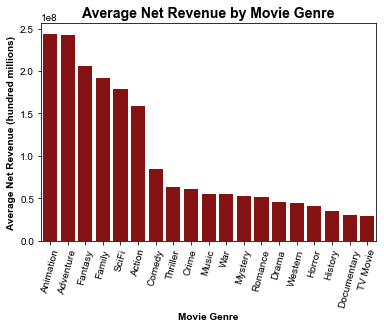

In [16]:

#average net revenue by movie genre
ax = sns.barplot(data=average_group, x='genre_ids', y='Net Revenue', color='#990000')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);
ax.set_title('Average Net Revenue by Movie Genre', fontsize = 14, weight = 'bold')
ax.set_ylabel('Average Net Revenue (hundred millions)', weight='bold')
ax.set_xlabel('Movie Genre', weight='bold');
sns.set_style('whitegrid')

After performing our analysis, we are able to conclude that Animation, Adventure, and Fantasy are the best movie genres in terms of net revenue. Our analysis showed that Animation poses the best opportunity out of these top genres, as it ranks 13th in number of movies produced. From this we infer that there is more room in the market for animated movies which on average make more money than other genres. Worth noting, TV Movies, Documentaries, and History are the worst genres by net revenue. We would recommend avoiding the production of these types of films.

# Studio Analysis

Streaming services often partner with other studios to help them produce content. An example of streaming services partnering with other studios is how Netflix often contracts with various animation studios to produce content for their platform, so we decided to explore the relationship between studios and net revenue. We believe that studios average net revenue per film is an important metric because it gives an insight on how many people went to see that movie in theaters, which in turn can give us a sense of how many people will stream that content. Along with analyzing the overall studios in the dataset , we analyzed studios that produced movies with larger production budgets on average and studios that had lower production budgets on average. 

In [17]:
bom = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Cleaning Studio columns to remove duplicates

In [18]:
bom['studio'].unique()
bom['studio'] = bom['studio'].str.strip('()')
bom['studio'] = bom['studio'].str.strip('(NL')
bom['studio'] = bom['studio'].str.strip()
bom['studio'] = bom['studio'].str.strip()
bom['studio'] = bom['studio'].str.replace('BV','Walt Disney')
bom['studio'] = bom['studio'].str.replace('P/DW','Pixar')
bom['studio'] = bom['studio'].str.replace('Uni.','Universial')
bom['studio'] = bom['studio'].str.replace('Par.','Paramount')
bom['studio'] = bom['studio'].str.strip()

### Feature Creation create year column & Join Merge Bom & Tn_budgets

In [19]:
## Adding a year column
tn_budgets['year'] =  pd.DatetimeIndex(tn_budgets['release_date']).year
### Merging bom dataframe and Tn budgets
bom_budgets = pd.merge(tn_budgets, bom[['studio','title', 'year']],left_on=['movie','year'], right_on = ['title','year'], how = 'inner')
### Creating a column called net that calculates the difference between worldwide_gross and production budget
bom_budgets['net'] = bom_budgets['worldwide_gross'] - bom_budgets['production_budget']

### Groups by studio and find the top ten Studio by net profit

In [20]:
#Reduces the amount of digits displayed
pd.set_option('display.float_format', lambda x: '%.3f' % x)
net_studio = bom_budgets.groupby("studio")['net'].mean().to_frame(name = 'average_net').reset_index()
top10_studio = net_studio.sort_values(by=['average_net'], ascending= False, na_position='first').head(10)

### Bargraph of top ten studio by Average net revenue

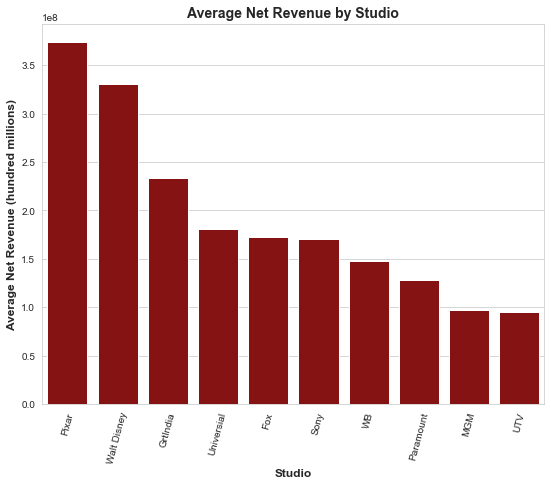

In [21]:
sns.set_style("whitegrid")
#setting figure size 
plt.figure(figsize =(9,7))
#creating bar plot
ax_studio = sns.barplot(data=top10_studio, x='studio', y='average_net',color='#990000' )
#setting title and axis names
ax_studio.set_title('Average Net Revenue by Studio', fontsize = 14, weight = 'bold')
ax_studio.set_ylabel('Average Net Revenue (hundred millions)', fontsize = 12, weight = 'bold' )
ax_studio.set_xlabel('Studio', fontsize = 12, weight = 'bold')
ax_studio.set_xticklabels(ax_studio.get_xticklabels(), rotation=75);
plt.show()

### Bar Graph of top ten studios whose production cost is in the 25th interquartile range

In [22]:
#grouping by studios by production cost
studio_cost = bom_budgets.groupby("studio")['production_budget'].mean().to_frame(name = 'average_cost').reset_index()
#creating_quartiles to find what inter quartile ranges of cost
studio_cost_qt = studio_cost['average_cost'].quantile([0.25, 0.5, 0.75])
# Selecting only studios in the 25th quartile or lower 
low_budget_studios = studio_cost[studio_cost['average_cost'] <= 6407142.857]
list_low = list(low_budget_studios['studio'])
low_cost_studios = bom_budgets[bom_budgets['studio'] == 'Viv' ]
#looping through a the list of every studio that is in the 25th quartile and appending it to a newframe
for i in list_low:
    low_cost_studios = bom_budgets[bom_budgets['studio'] ==  i].append(low_cost_studios)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
low_net_studio = low_cost_studios.groupby("studio")['net'].mean().to_frame(name = 'average_net').reset_index()
top10_low = low_net_studio.sort_values(by=['average_net'], ascending= False, na_position='first').head(10)

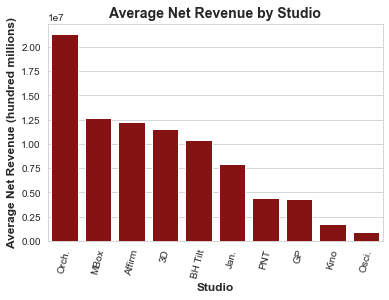

<Figure size 648x504 with 0 Axes>

In [23]:
sns.set_style("whitegrid")
#creating bar plot
ax_studio_low = sns.barplot(data=top10_low, x='studio', y='average_net',color='#990000' )
#setting figure size 
plt.figure(figsize =(9,7))
#setting title and axis names 
ax_studio_low.set_title('Average Net Revenue by Studio', fontsize = 14, weight = 'bold')
ax_studio_low.set_ylabel('Average Net Revenue (hundred millions)', fontsize = 12, weight = 'bold' )
ax_studio_low.set_xlabel('Studio', fontsize = 12, weight = 'bold')
ax_studio_low.set_xticklabels(ax_studio_low.get_xticklabels(), rotation=75)
plt.show()

Our analysis showed that established studios generate more net revenue on average per film. Further, our analysis showed that studios with higher production budgets tend to generate more net revenue per film than studios with lower production budgets.. The studios that had the highest net revenue on average per film were: Pixar, Disney, And GrtIndia. We recommend that Computer Vison partner with Studios that are more well known, and I have higher production budgets on average.

# Release Date Analysis

In the Movie Budget Database, we explored how movie release dates relate to net revenue. This is an important factor because many people will typically see a movie when they have free time, therefore it can be inferred that a movie released at a specific time frame will generate more revenue than other time frames. These time frames can be broken down naturally into the four seasons: Spring, Summer, Fall, and Winter. This analysis offers valuable insights for Computer Vision. Namely, that Computer Vision should release a movie during the Summer, as this season will provide the greatest opportunity for the most revenue.

## Hypothesis

### Alternative hypothesis is that movies released in the summer season will generate a higher net revenue than the population average
#### $H_a$ = 𝜇<𝑀
_____________________________________________________________________________________________

### Null hypothesis is that movies released in the summer season will not generate a higher net revenue than population average
#### $H_0 $ = 𝜇≥𝑀

In [24]:
# Taking month out of release date and creating new column with the values
tn_budgets["release_month"] = tn_budgets["release_date"].dt.month 

# Creating a variable that groups the release_month and Net Revenue columns and calculated the mean of each release month
by_month = tn_budgets.groupby("release_month")["Net Revenue"].mean()

## Map average gross revenue by month

<AxesSubplot:title={'center':'AVG Net Per Month'}, xlabel='Release Month', ylabel='Mean Net'>

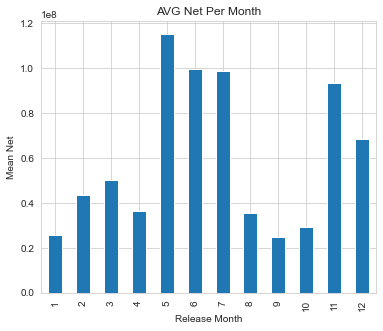

In [25]:
# Plotting the data from by_month into a bar graph
by_month.plot(kind='bar', title='AVG Net Per Month', ylabel='Mean Net',
         xlabel='Release Month', figsize=(6, 5))

 From this chart we notice that movies released in summer generate a higher Net Revenue

In [26]:
# Create dictionary to assign month to season to properly evaluate the data
season_month = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Fall', 10:'Fall', 11:'Fall'}

# map through data and create new column with movie release season    
tn_budgets['release_season'] = tn_budgets["release_month"].map(season_month)
tn_budgets.sort_values(by=["release_season"])
by_season = tn_budgets.groupby("release_season")["Net Revenue"].mean().reset_index()

In [27]:
# Create new dataframe that groups the release_season and Net Revenue columns to see avg net revenue
season_mean = tn_budgets.groupby("release_season")["Net Revenue"].mean().reset_index()
season_mean

,release_season,Net Revenue
0,Fall,47803627.875
1,Spring,65128830.067
2,Summer,76676469.389
3,Winter,51863328.816


In [28]:
season_count = tn_budgets.groupby("release_season")["Net Revenue"].count().reset_index()
season_count

,release_season,Net Revenue
0,Fall,1552
1,Spring,1331
2,Summer,1415
3,Winter,1484


In [29]:
import scipy.stats as stats
from math import sqrt
x_bar = season_mean["Net Revenue"][2] # sample mean of summer 
n = season_count["Net Revenue"][2] # number of sample inputs
sigma = tn_budgets["Net Revenue"].std() # sd of all inputs
mu = tn_budgets["Net Revenue"].mean() # all inputs mean 

z_value = (x_bar - mu)/(sigma/sqrt(n))
z_value

4.319856231441833

In [30]:
p_value = stats.norm.sf(z_value)
print('p_value = 0.000007806531178731228')
p_value

p_value = 0.000007806531178731228


7.806544209520419e-06

Text(0.5, 0, 'Release season')

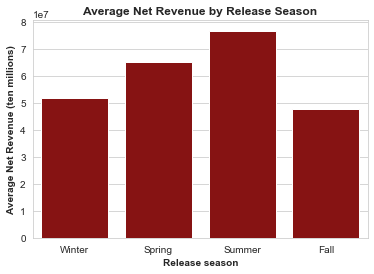

In [31]:
# Plot out the by_season variable that allows us to evaluate average net revenue by season
ax = sns.barplot(data=by_season, x='release_season', y='Net Revenue', color='#990000', order=['Winter', 'Spring', 'Summer', 'Fall'])
ax.set_xticklabels(ax.get_xticklabels());
ax.set_title('Average Net Revenue by Release Season', fontsize=12, weight='bold')
ax.set_ylabel('Average Net Revenue (ten millions)', weight='bold')
ax.set_xlabel('Release season', weight='bold')

# Conclusion
### alpha = .05
### z score = 4.319
### p score = 0.000007806531178731228
## After running the z score and p score, we can reject the null hypothesis with 99.9 percent confidence

The data we analyzed showed that movies released during Summer generated the most net revenue. To see the significance in net revenue between the average release month and the Summer months, we ran statistical tests. The z-score and p-score were used to measure our data, which showed that there is a 99.9 percent chance that Summer is indeed the best season to release in terms of net revenue. With this understanding of the data, we highly recommend movies be released during the Summer months.